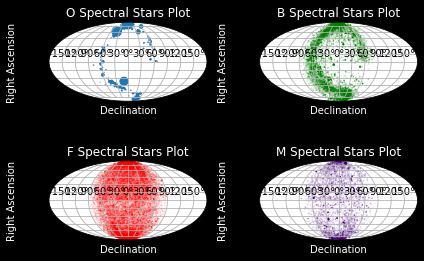

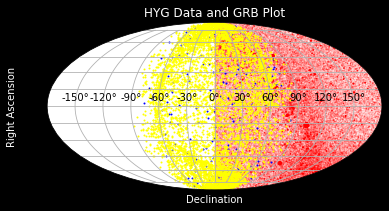

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lxml.html as lh

#Part 1
df=pd.read_csv("hygdata_v3.csv")

o_spect=list() #finding the O spectrum stars and their relevant data to plot graph
o_rarad=list()
o_decrad=list()
o_dist=list()
o_lum=list()

for i in range(len(df['spect'])-1):
  if type(df['spect'][i])==float:  #removing all empty records in the spectrum field
    continue
  if str.startswith(df['spect'][i], 'O'): #adding star data to the lists if spectrum starts with O
    o_spect.append(df['spect'][i])
    o_rarad.append(df['rarad'][i])
    o_decrad.append(df['decrad'][i])
    o_dist.append(df['dist'][i])
    o_lum.append(df['lum'][i])

#creating a database of O spectrum stars
o={'Spect':o_spect, 'Rarad':o_rarad, 'Decrad':o_decrad, 'Dist':o_dist, 'Lum':o_lum}  
o_table=pd.DataFrame(o, columns=['Spect','Rarad','Decrad','Dist','Lum'])
o_table['Flux']=o_table['Lum']/(4*np.pi*o_table['Dist']**2) #Finding flux based on the formula F=L/(4pid^2)

b_spect=list() #finding the B spectrum stars and their relevant data to plot graph
b_rarad=list()
b_decrad=list()
b_dist=list()
b_lum=list()

for i in range(len(df['spect'])-1):
  if type(df['spect'][i])==float: #removing all empty records in the spectrum field
    continue
  if str.startswith(df['spect'][i], 'B'): #adding star data to the lists if spectrum starts with B
    b_spect.append(df['spect'][i])
    b_rarad.append(df['rarad'][i])
    b_decrad.append(df['decrad'][i])
    b_dist.append(df['dist'][i])
    b_lum.append(df['lum'][i])

#creating a database of B spectrum stars
b={'Spect':b_spect, 'Rarad':b_rarad, 'Decrad':b_decrad, 'Dist':b_dist, 'Lum':b_lum}
b_table=pd.DataFrame(b, columns=['Spect','Rarad','Decrad','Dist','Lum'])
b_table['Flux']=b_table['Lum']/(4*np.pi*b_table['Dist']**2) #Finding flux based on the formula F=L/(4pid^2)

f_spect=list() #finding the F spectrum stars and their relevant data to plot graph
f_rarad=list()
f_decrad=list()
f_dist=list()
f_lum=list()

for i in range(len(df['spect'])-1):
  if type(df['spect'][i])==float: #removing all empty records in the spectrum field
    continue
  if str.startswith(df['spect'][i], 'F'): #adding star data to the lists if spectrum starts with F
    f_spect.append(df['spect'][i])
    f_rarad.append(df['rarad'][i])
    f_decrad.append(df['decrad'][i])
    f_dist.append(df['dist'][i])
    f_lum.append(df['lum'][i])

#creating a database of F spectrum stars
f={'Spect':f_spect, 'Rarad':f_rarad, 'Decrad':f_decrad, 'Dist':f_dist, 'Lum':f_lum}
f_table=pd.DataFrame(f, columns=['Spect','Rarad','Decrad','Dist','Lum'])
f_table['Flux']=f_table['Lum']/(4*np.pi*f_table['Dist']**2) #Finding flux based on the formula F=L/(4pid^2)

m_spect=list() #finding the M spectrum stars and their relevant data to plot graph
m_rarad=list()
m_decrad=list()
m_dist=list()
m_lum=list()

for i in range(len(df['spect'])-1):
  if type(df['spect'][i])==float: #removing all empty records in the spectrum field
    continue
  if str.startswith(df['spect'][i], 'M'): #adding star data to the lists if spectrum starts with M
    m_spect.append(df['spect'][i])
    m_rarad.append(df['rarad'][i])
    m_decrad.append(df['decrad'][i])
    m_dist.append(df['dist'][i])
    m_lum.append(df['lum'][i])

#creating a database of M spectrum stars
m={'Spect':m_spect, 'Rarad':m_rarad, 'Decrad':m_decrad, 'Dist':m_dist, 'Lum':m_lum}
m_table=pd.DataFrame(m, columns=['Spect','Rarad','Decrad','Dist','Lum'])
m_table['Flux']=m_table['Lum']/(4*np.pi*m_table['Dist']**2) #Finding flux based on the formula F=L/(4pid^2)

fig=plt.figure()
fig.patch.set_facecolor('black') #making background colour dark

fig.add_subplot(221, projection='mollweide') #creating 2*2 O star mollweide projection 
plt.scatter(o_table['Decrad'], o_table['Rarad'], s=o_table['Flux']*10**4) 
#Plot drawn with radian values of RA and Dec and marker size proportional to flux (10^4 added to increase size and make sure marker is visible)
plt.xlabel("Declination", color="white")
plt.ylabel("Right Ascension", color="white")
plt.title("O Spectral Stars Plot", color="white")
plt.grid()

fig.add_subplot(222, projection='mollweide') #creating 2*2 B star mollweide projection
plt.scatter(b_table['Decrad'], b_table['Rarad'], s=b_table['Flux']*10**2, color='green')
plt.xlabel("Declination", color="white")
plt.ylabel("Right Ascension", color="white")
plt.title("B Spectral Stars Plot", color="white")
plt.grid()

fig.add_subplot(223, projection='mollweide') #creating 2*2 F star mollweide projection
plt.scatter(f_table['Decrad'], f_table['Rarad'], s=f_table['Flux']*10**2, color='red')
plt.xlabel("Declination", color="white")
plt.ylabel("Right Ascension", color="white")
plt.title("F Spectral Stars Plot", color="white")
plt.grid()

fig.add_subplot(224, projection='mollweide') #creating 2*2 M star mollweide projection
plt.scatter(m_table['Decrad'], m_table['Rarad'], s=m_table['Flux']*10**2, color='indigo')
plt.xlabel("Declination", color="white")
plt.ylabel("Right Ascension", color="white")
plt.title("M Spectral Stars Plot", color="white")
plt.grid()
fig.tight_layout() #improve spacing between various subplots
plt.show()

fig.savefig("outputpart1.png")

#Part 2

#scraping from the website
page=requests.get("http://astrosat.iucaa.in/czti/?q=grb")
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr') #getting row elements of the table

#creating a pandas database
col=[] #adding column names to the database
x=0
for t in tr_elements[0]:
    x+=1
    rawname=(t.text_content()).strip()
    name=rawname.replace('\n','') #removing unnecessary formatting
    col.append((name,[]))

for j in range(1,len(tr_elements)): #getting records information row by row
    T=tr_elements[j]
    i=0
    for t in T.iterchildren():
        rawdata=(t.text_content()).replace('\n','') #removing unnecessary formatting
        data=rawdata.replace('\t','')
        if i>0:
            try:
                data=int(data)
            except:
                pass
        col[i][1].append(data)
        i+=1

Dict={title:column for (title,column) in col}
dg=pd.DataFrame(Dict) #created database

temp_list=list()
ra_list=list()
dec_list=list()

#the RA and Dec values necessary to plot mollweide projection are in the same cell separated by a comma
#the following code separates the two values and adds them to two separate lists
for item in range(len(dg['RA, Decdeg'])-1):
  temp_list=dg['RA, Decdeg'][item].split(',') #separating by a comma
  if(len(temp_list)<2): #removing empty values
    continue
  if temp_list[0]=="--" or temp_list[0]==" --" or temp_list[1]=="--" or temp_list[1]==" --":
    continue
  ra_list.append(float(temp_list[0])) #converting string value to float
  dec_list.append(temp_list[1])

#the following code is to remove the white space between the comma and Dec values as given in the website
#and then convert the string elements in the list to float
proper_dec_list=list()
for i in dec_list:
  proper_dec_list.append(float(i.strip()))

variable_stars_ra=list()
variable_stars_dec=list()
for item in range(len(df['id'])-1): #finding variable stars and necessary data
  if type(df['var'][item])==float and np.isnan(float(df['var'][item])): #separating NaN and actual values in 'var' column
    continue
  variable_stars_ra.append(df['rarad'][item])
  variable_stars_dec.append(df['decrad'][item])

df['Flux']=df['lum']/(4*np.pi*df['dist']**2) #finding Flux in the original hygdata database
#Based on the formula F=L/(4*pi*d^2)

figure=plt.figure()
figure.patch.set_facecolor('black') #setting plot background to dark colour

axe = figure.add_subplot(111, projection='mollweide') #creating mollweide projection
#plotting radian values of RA and Dec from hygdata database
plt.scatter(df['rarad'], df['decrad'], s=df['Flux']*10**2, color='red')
#plotting radian values of GRB 
plt.scatter(np.radians(proper_dec_list),np.radians(ra_list), s=1, color="blue")
#plotting radian values of RA and Dec for variable stars
plt.scatter(variable_stars_dec, variable_stars_ra, s=1, color="yellow")
plt.xlabel("Declination", color="white")
plt.ylabel("Right Ascension", color="white")
plt.title("HYG Data and GRB Plot", color="white")
plt.grid()
figure.savefig("outputpart2.png")
plt.show()
